# Assignment 1

## Abstract
#### `Aim`
In the assignment below, we are trying to run the listed alorithms to find the best metrics of the model. Also, trying to find the best hyperparameters for the fit and fine tune it. We perform our analysis on the basis of the hyperparameter found and the matrices for the respective model fit. In general we compare:

* Which hyper-parameters are important?
* What hyper-parameter values work best?
* Which supervised learner works best on the test data?

And have concluded the result at the end with our analysis.

#### `Methods`
1. Random forest Classifer
2. Random Forest Regression
3. XGBoost Classifier & XGBoost Regression
4. Logistic Regression
5. Redge Regression
6. Linear Regression
7. k-Nearest Neighbors (NN) Regression

#### `Data Source`

I am using the King County Housing Data set. It has 19375 rows and 51 columns. There is a mix of quantitative and qualitative feautres.

The datset from - https://www.kaggle.com/harlfoxem/housesalesprediction/home 
has been cleansed and provided with one hot encoding for the columns - "Floor", "view", "conditions", "zipcode" & "grade". The top 6 best zipcode is choosen and represented by the column.
On performing the algorithms, we try ti find the matrices for different value of paramaters and try to tune the parameters to get a good fir for the algorithm.


In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from pandas import Series
%matplotlib inline
import requests

from sklearn.model_selection import train_test_split

from sklearn import metrics

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
# url="https://github.com/cs109/2014_data/blob/master/countries.csv"
features=pd.read_csv("./kc_house_data.csv")
features.head()

,index,price,bedrooms,bathrooms,sqft_living,sqft_lot,waterfront,sqft_above,sqft_basement,yr_built,...,grade#10,grade#11,grade#12,grade#13,zipcode#98004,zipcode#98102,zipcode#98109,zipcode#98112,zipcode#98039,zipcode#98040
0,16768,437500,3,2.25,1970,35100,0,1970,0,1977,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,9596,790000,3,2.50,2600,4750,0,1700,900,1951,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,9587,675000,5,2.50,2820,67518,0,2820,0,1979,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,20602,555000,4,2.50,3310,6500,0,3310,0,2012,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,11577,440000,4,2.25,2160,8119,0,1080,1080,1966,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [4]:
features.describe()

,index,price,bedrooms,bathrooms,sqft_living,sqft_lot,waterfront,sqft_above,sqft_basement,yr_built,...,grade#10,grade#11,grade#12,grade#13,zipcode#98004,zipcode#98102,zipcode#98109,zipcode#98112,zipcode#98039,zipcode#98040
count,19375.000000,1.937500e+04,19375.000000,19375.000000,19375.000000,1.937500e+04,19375.000000,19375.000000,19375.000000,19375.000000,...,19374.000000,19374.000000,19374.000000,19374.000000,19374.000000,19374.000000,19374.000000,19374.000000,19374.000000,19374.000000
mean,10814.208723,5.380781e+05,3.373935,2.117123,2083.220748,1.505800e+04,0.007432,1790.476077,292.744671,1970.968361,...,0.052854,0.018530,0.004129,0.000619,0.014814,0.004955,0.005007,0.012233,0.002219,0.013214
std,6245.132750,3.649242e+05,0.932142,0.770802,920.704504,4.094024e+04,0.085892,828.788124,444.668619,29.389126,...,0.223748,0.134861,0.064128,0.024880,0.120810,0.070220,0.070583,0.109927,0.047060,0.114191
min,0.000000,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,0.000000,290.000000,0.000000,1900.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,5412.500000,3.200000e+05,3.000000,1.750000,1430.000000,5.060000e+03,0.000000,1190.000000,0.000000,1951.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,10830.000000,4.500000e+05,3.000000,2.250000,1920.000000,7.625000e+03,0.000000,1560.000000,0.000000,1975.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,16230.000000,6.410000e+05,4.000000,2.500000,2550.000000,1.072500e+04,0.000000,2216.500000,570.000000,1997.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,21612.000000,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,1.000000,9410.000000,4820.000000,2015.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


Below, we are trying to find the correlation between the columns. We performe this, in order to understand the relationship between the columns. 

To give an explanation with example : The columns 'bedrooms' & 'price' are higly corelated with a +ve realtion with each other. Which means, if bedrooms increases, the price of the appartment increases.

Similarly, the realtion between the waterfront and bedroom is less corelated, which means they are not dependent on each other.

A better intrepretation for a columns bedroom w.r.t grades will be that as grades increase #1#2#3#4#5 and so on, the number of bedroom inceases

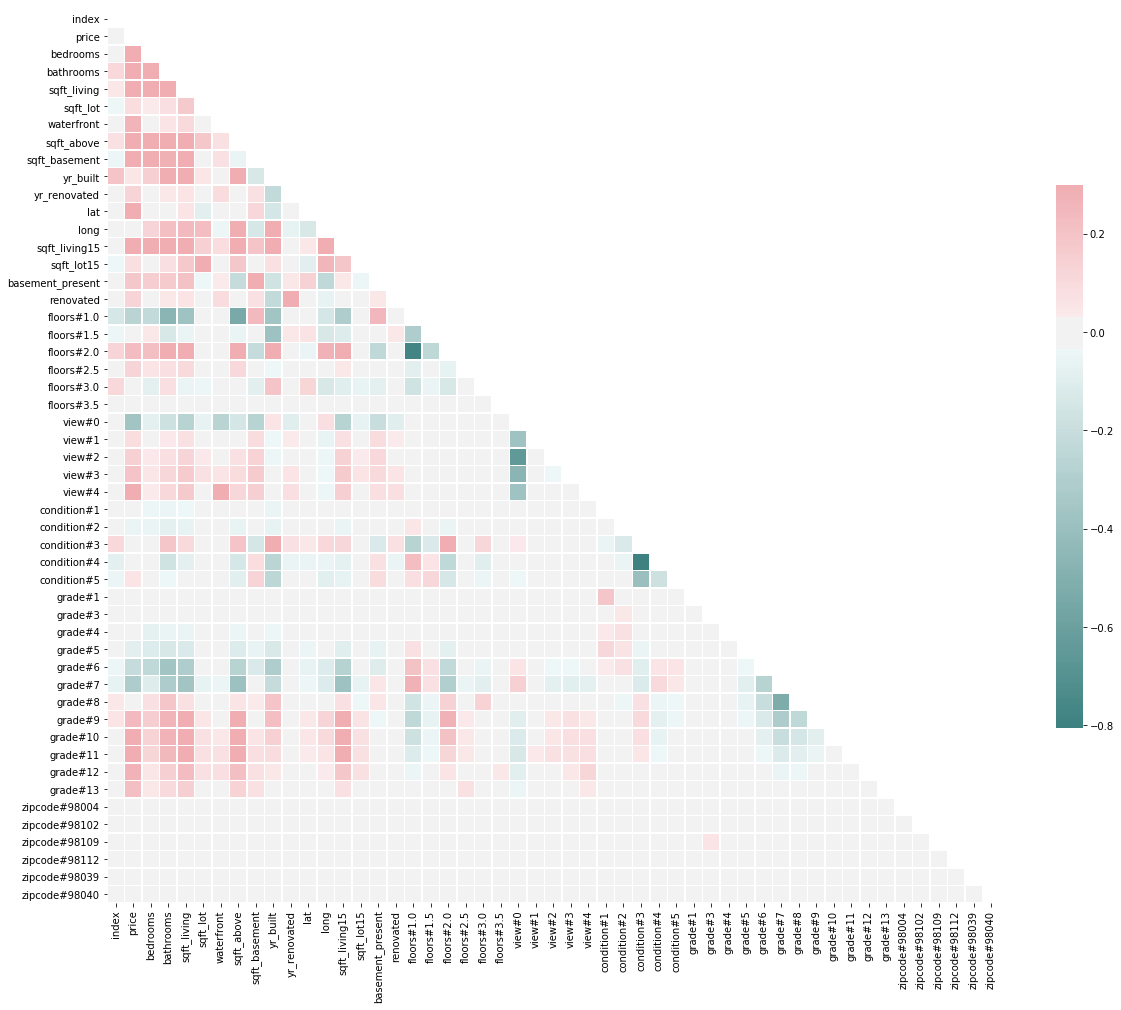

In [5]:
corr = features.corr()

mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(20, 20))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(190, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

The above correlation has been represented as a matrix, for visualisation purpose in a matrix format

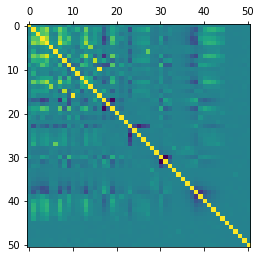

In [6]:
plt.matshow(features.corr())

We find the median for the column "price" to further create a new categorical column called "price_cat". The new columns deferetiates the data greater or lessr than the median found for "price"

In [7]:
median_price = features.loc[:,"price"].median()
print(median_price)

450000.0


Adding column to dataframe for holding categorical price value : HIGH/LOW

All values < median are LOW and Values >= median are HIGH

In [8]:
features['price_cat'] = features['price'].apply(lambda x: 1 if x > median_price else -1)
features[['price','price_cat']].head(10)

,price,price_cat
0,437500,-1
1,790000,1
2,675000,1
3,555000,1
4,440000,-1
5,295000,-1
6,470000,1
7,550000,1
8,313000,-1
9,626000,1


In [9]:
features.head(5)

,index,price,bedrooms,bathrooms,sqft_living,sqft_lot,waterfront,sqft_above,sqft_basement,yr_built,...,grade#11,grade#12,grade#13,zipcode#98004,zipcode#98102,zipcode#98109,zipcode#98112,zipcode#98039,zipcode#98040,price_cat
0,16768,437500,3,2.25,1970,35100,0,1970,0,1977,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-1
1,9596,790000,3,2.50,2600,4750,0,1700,900,1951,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
2,9587,675000,5,2.50,2820,67518,0,2820,0,1979,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
3,20602,555000,4,2.50,3310,6500,0,3310,0,2012,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
4,11577,440000,4,2.25,2160,8119,0,1080,1080,1966,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-1


Trying to find null/NaN values in the dataset, and as a result, there is one row consisting null value

In [10]:
features.isnull().sum()

index               0
price               0
bedrooms            0
bathrooms           0
sqft_living         0
sqft_lot            0
waterfront          0
sqft_above          0
sqft_basement       0
yr_built            0
yr_renovated        0
lat                 0
long                0
sqft_living15       0
sqft_lot15          0
basement_present    0
renovated           0
floors#1.0          0
floors#1.5          1
floors#2.0          1
floors#2.5          1
floors#3.0          1
floors#3.5          1
view#0              1
view#1              1
view#2              1
view#3              1
view#4              1
condition#1         1
condition#2         1
condition#3         1
condition#4         1
condition#5         1
grade#1             1
grade#3             1
grade#4             1
grade#5             1
grade#6             1
grade#7             1
grade#8             1
grade#9             1
grade#10            1
grade#11            1
grade#12            1
grade#13            1
zipcode#98

We drop the drop the row and proceed ahead. As the null values data can rise it to biasing

In [11]:
features=features.dropna()
features.isnull().sum()

index               0
price               0
bedrooms            0
bathrooms           0
sqft_living         0
sqft_lot            0
waterfront          0
sqft_above          0
sqft_basement       0
yr_built            0
yr_renovated        0
lat                 0
long                0
sqft_living15       0
sqft_lot15          0
basement_present    0
renovated           0
floors#1.0          0
floors#1.5          0
floors#2.0          0
floors#2.5          0
floors#3.0          0
floors#3.5          0
view#0              0
view#1              0
view#2              0
view#3              0
view#4              0
condition#1         0
condition#2         0
condition#3         0
condition#4         0
condition#5         0
grade#1             0
grade#3             0
grade#4             0
grade#5             0
grade#6             0
grade#7             0
grade#8             0
grade#9             0
grade#10            0
grade#11            0
grade#12            0
grade#13            0
zipcode#98

## `Part A`

We shall be performing thr below algorithms for classification model.

* Bagging Algo : Random Forest Classifier
* Boosting Algo : XGBoost Classifier

We use Bagging and Boosting algorithm because they give us `LESS` biasing and vairance. They avoid overfitting the model prediction.

## Random Forest Classifier

In [12]:
features.columns

Index(['index', 'price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
       'waterfront', 'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated',
       'lat', 'long', 'sqft_living15', 'sqft_lot15', 'basement_present',
       'renovated', 'floors#1.0', 'floors#1.5', 'floors#2.0', 'floors#2.5',
       'floors#3.0', 'floors#3.5', 'view#0', 'view#1', 'view#2', 'view#3',
       'view#4', 'condition#1', 'condition#2', 'condition#3', 'condition#4',
       'condition#5', 'grade#1', 'grade#3', 'grade#4', 'grade#5', 'grade#6',
       'grade#7', 'grade#8', 'grade#9', 'grade#10', 'grade#11', 'grade#12',
       'grade#13', 'zipcode#98004', 'zipcode#98102', 'zipcode#98109',
       'zipcode#98112', 'zipcode#98039', 'zipcode#98040', 'price_cat'],
      dtype='object')

In the below, we initially store the columns as features for further reference.
Then, we split the dataset into training and test data in the ratio of 7:3

In [13]:

X_features = ['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
       'waterfront', 'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated',
       'lat', 'long', 'sqft_living15', 'sqft_lot15', 'basement_present',
       'renovated', 'floors#1.0', 'floors#1.5', 'floors#2.0', 'floors#2.5',
       'floors#3.0', 'floors#3.5', 'view#0', 'view#1', 'view#2', 'view#3',
       'view#4', 'condition#1', 'condition#2', 'condition#3', 'condition#4',
       'condition#5', 'grade#1', 'grade#3', 'grade#4', 'grade#5', 'grade#6',
       'grade#7', 'grade#8', 'grade#9', 'grade#10', 'grade#11', 'grade#12',
       'grade#13', 'zipcode#98004', 'zipcode#98102', 'zipcode#98109',
       'zipcode#98112', 'zipcode#98039', 'zipcode#98040']

X=features[['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
       'waterfront', 'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated',
       'lat', 'long', 'sqft_living15', 'sqft_lot15', 'basement_present',
       'renovated', 'floors#1.0', 'floors#1.5', 'floors#2.0', 'floors#2.5',
       'floors#3.0', 'floors#3.5', 'view#0', 'view#1', 'view#2', 'view#3',
       'view#4', 'condition#1', 'condition#2', 'condition#3', 'condition#4',
       'condition#5', 'grade#1', 'grade#3', 'grade#4', 'grade#5', 'grade#6',
       'grade#7', 'grade#8', 'grade#9', 'grade#10', 'grade#11', 'grade#12',
       'grade#13', 'zipcode#98004', 'zipcode#98102', 'zipcode#98109',
       'zipcode#98112', 'zipcode#98039', 'zipcode#98040']]  # Features

y=features['price_cat']  # Labels
       
# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3) # 70% training and 30% test

Further, we perfrom Random Forest Bagging algorithm. We perfrom the fit on the test dataset for the prediction of the model

In [14]:
#Import Random Forest Model
from sklearn.ensemble import RandomForestClassifier

#Create a Gaussian Classifier
clf=RandomForestClassifier(n_estimators=100)

#Train the model using the training sets y_pred=clf.predict(X_test)
clf.fit(X_train,y_train)

y_pred=clf.predict(X_test)

In [15]:
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.906760708756236


Now, as we can see the accurancy turned out to be around 0.9. Its a good measure of performace as our model has performed well.

Further, we check and select few parameters, to tune the model well.

Through random forest meta estimator we check the number of decision tree classifiers on various sub-samples of the dataset and use averaging to improve the predictive accuracy and control over-fitting.

The sub-sample size is always the same as the original input sample size but the samples are drawn with replacement if `bootstrap=True` (default).

In [16]:
RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

Further, we select the imporatant parameters for the tree and store it in a variable to use it. And sort it as per the value obtained.

We use it to store in an array using pandas series by indexing it with the columns of the dataset that was stored previously.

In [17]:
feature_imp = pd.Series(clf.feature_importances_,index=X_features).sort_values(ascending=False)
feature_imp

lat                 0.281461
sqft_living         0.128389
sqft_living15       0.084994
sqft_above          0.078544
long                0.053097
sqft_lot15          0.050323
sqft_lot            0.049351
yr_built            0.046847
bathrooms           0.039622
grade#7             0.025576
sqft_basement       0.024484
bedrooms            0.019619
grade#6             0.015569
grade#8             0.013282
grade#9             0.011682
view#0              0.009630
floors#1.0          0.009490
basement_present    0.009368
floors#2.0          0.006249
condition#3         0.005803
grade#10            0.005278
condition#4         0.004396
floors#1.5          0.003548
condition#5         0.003325
yr_renovated        0.002897
view#2              0.002117
renovated           0.001830
zipcode#98004       0.001379
view#4              0.001321
floors#3.0          0.001227
view#3              0.001162
zipcode#98040       0.001144
waterfront          0.001081
view#1              0.000924
grade#5       

#### Top features

In [18]:
top_features = feature_imp.head(10)
top_features

lat              0.281461
sqft_living      0.128389
sqft_living15    0.084994
sqft_above       0.078544
long             0.053097
sqft_lot15       0.050323
sqft_lot         0.049351
yr_built         0.046847
bathrooms        0.039622
grade#7          0.025576
dtype: float64

We plot a graph to show the imporatant features and their score of importance.

From the Bar graph plotted, we can infer that 'lat' 'sqft_living''sqft_livinf15' 'sqft_above' 'long' 'sqft_lot15' are the top 5 important featues

No handles with labels found to put in legend.


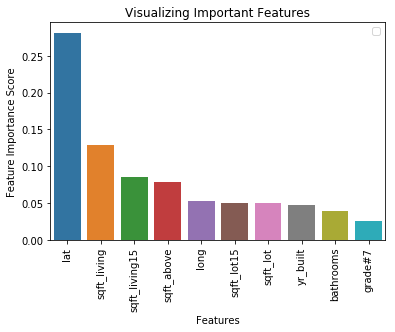

In [127]:
# Creating a bar plot
sns.barplot(x=top_features.index, y=top_features, orient="v")
# Add labels to your graph
plt.xlabel('Features')
plt.ylabel('Feature Importance Score')
plt.title("Visualizing Important Features")
plt.xticks(rotation=90)
plt.legend()
plt.show()

In [20]:
from pprint import pprint

In [21]:
# Look at parameters used by our current forest
print('Parameters currently in use:\n')
pprint(clf.get_params())

Parameters currently in use:

{'bootstrap': True,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': 1,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}


According to the documentation, the most important settings are the number of trees in the forest (n_estimators) and the number of features considered for splitting at each leaf node (max_features)

We will try adjusting the following set of hyperparameters:

### Finding important hyper-parameters

The important parameters for a Random Forest Classfier are as follows:

### We will use RandomSearchCV and GridSearchCV to find the best values for the same

### 1. RandomSearchCV

We perform this for Cross Validating our finding. The cross validation helps us in ignoring the biasing and overfitting if in case our model is providinf. We check the peformance by cross validating.

In [22]:
from sklearn.model_selection import RandomizedSearchCV

In [23]:
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 10, stop = 200, num = 5)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(2, 10, num = 5)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [2, 4]
# Method of selecting samples for training each tree
#bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf}
pprint(random_grid)

{'max_depth': [2, 4, 6, 8, 10, None],
 'max_features': ['auto', 'sqrt'],
 'min_samples_leaf': [2, 4],
 'min_samples_split': [5, 10],
 'n_estimators': [10, 57, 105, 152, 200]}


We have listed the parameters and the values that wil be considered with the range of it using `Grid Search`.

Further, with those values of parameters we try to fit our model to check its performance, using RandomSearchCV.

In [24]:
# Use the random grid to search for best hyperparameters
# First create the base model to tune
clf_base = RandomForestClassifier()
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
clf_random = RandomizedSearchCV(estimator = clf_base, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)
# Fit the random search model
clf_random.fit(X_train,y_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:   20.1s
[Parallel(n_jobs=-1)]: Done 138 tasks      | elapsed:   44.2s
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed:  1.5min finished


RandomizedSearchCV(cv=3, error_score='raise',
          estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
          fit_params=None, iid=True, n_iter=100, n_jobs=-1,
          param_distributions={'n_estimators': [10, 57, 105, 152, 200], 'max_features': ['auto', 'sqrt'], 'max_depth': [2, 4, 6, 8, 10, None], 'min_samples_split': [5, 10], 'min_samples_leaf': [2, 4]},
          pre_dispatch='2*n_jobs', random_state=42, refit=True,
          return_train_score='warn', scoring=None, verbose=2)

In [25]:
clf_random.best_params_

{'n_estimators': 57,
 'min_samples_split': 5,
 'min_samples_leaf': 2,
 'max_features': 'auto',
 'max_depth': None}

Thus, we listed out the best hyperparameters value for the model for its best accurancy.

### Evaluate Random Search

We define a function to evaluate the model and perform the prediction on the test dataset and return the `AUC` metric of the model.

In [26]:
## Common Classification algorithm evaluator. It returns the roc_auc
from sklearn.metrics import roc_curve, auc
def evaluate(model, X_train,y_train, X_test, y_test):
    model.fit(X_train,y_train)
    predictions = model.predict(X_test)
    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, predictions)
    roc_auc = auc(false_positive_rate, true_positive_rate)
    #print(roc)
    return roc_auc

As seen the above `best_params_` found, the `n_estimator` is `57`. Applying the same will give us the best fit for the model evaluation. Thus, in the previous code, the `n_estimator` was `10`, changin it to `57` gives a better `ROC` change from `0.80` to `0.9058`

In [27]:
base_model = RandomForestClassifier(n_estimators = 57, random_state = 42)
best_random = clf_random.best_estimator_

In [28]:
print('ROC for base model : ' + str(evaluate(base_model,X_train,y_train, X_test, y_test)))
print('ROC for best model : ' + str(evaluate(best_random,X_train,y_train, X_test, y_test)))

ROC for base model : 0.9058417857350242
ROC for best model : 0.9078105168852499


On evaluation, we found in the above is that `0.9078` ROC value on the best model is a good denotion of its accuracy for a model.

### 2. Grid Search with Cross Validation

Now, we will perfrom a GridSearch Cross Validation, while doing so, we give a paramater range in order to start checking the accurace of the model fit.

In [29]:
from sklearn.model_selection import GridSearchCV
# Create the parameter grid based on the results of random search 
param_grid = {
    'bootstrap': [True],
    'max_features': ['auto'],
    'min_samples_leaf': [1,2,3],
    'min_samples_split': [3,5,7],
    'n_estimators': [100, 200, 2000]
}
# Create a based model
clf = RandomForestClassifier()
# Instantiate the grid search model
grid_search = GridSearchCV(estimator = clf, param_grid = param_grid, 
                          cv = 3, n_jobs = -1, verbose = 2)

In [30]:
grid_search.fit(X_train, y_train)

Fitting 3 folds for each of 27 candidates, totalling 81 fits


[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:   32.2s
[Parallel(n_jobs=-1)]: Done  81 out of  81 | elapsed:  4.5min finished


GridSearchCV(cv=3, error_score='raise',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
       fit_params=None, iid=True, n_jobs=-1,
       param_grid={'bootstrap': [True], 'max_features': ['auto'], 'min_samples_leaf': [1, 2, 3], 'min_samples_split': [3, 5, 7], 'n_estimators': [100, 200, 2000]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=2)

In [31]:
grid_search.best_params_

{'bootstrap': True,
 'max_features': 'auto',
 'min_samples_leaf': 1,
 'min_samples_split': 3,
 'n_estimators': 2000}

Thus, the best paramter with their values for the best fit is listed above.

In [34]:
best_grid = grid_search.best_estimator_

In [35]:
print('ROC for best grid search model : ' + str(evaluate(best_grid,X_train,y_train, X_test, y_test)))

ROC for best grid search model : 0.9078105168852499


Now, using grid search we find the ROC for the model fit to be `0.9078` which matches our RandomForest CV.

Now from the RandomForest and XGBoost algorithm model excution below were the parameters we could find from each respectively on perfomring Cross Validation for each respectively:

* RandonForest

`{'n_estimators': 57,
 'min_samples_split': 5,
 'min_samples_leaf': 2,
 'max_features': 'auto',
 'max_depth': None}`
 
 Through GridSearch we got the below best parameters:
 
 `{'bootstrap': True,
 'max_features': 'auto',
 'min_samples_leaf': 1,
 'min_samples_split': 3,
 'n_estimators': 2000}`
 
 From the above we can infer the BEST hyper prameters for tuning the model are as below:
 
 * `n_estimators`
 * `min_samples_leaf`
 * `max_features`
 * `min_samples_split`

### Now lets implement XGBoost (eXtreme Gradient Boosting)

I’ll consider only tree booster here because it always outperforms the linear booster and thus the later is rarely used.

In [36]:
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score

In [37]:
xgBoostClassifierModel = XGBClassifier()
xgBoostClassifierModel.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=1, nthread=None, objective='binary:logistic', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1)

In [38]:
# make predictions for test data
y_pred = xgBoostClassifierModel.predict(X_test)
predictions = [round(value) for value in y_pred]

# evaluate predictions
accuracy = accuracy_score(y_test, predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 90.61%


Accuracy 90.61% is a good messure of the model performace. Further we will perform the GridSearch to check for the best parameter fit for the model build

In [39]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold

Wecheck the run for `n_estimators` and plot the values for n_estimators against its log loss

Best: -0.209829 using {'n_estimators': 350}
-0.257586 (0.007068) with: {'n_estimators': 50}
-0.230445 (0.007295) with: {'n_estimators': 100}
-0.220998 (0.007793) with: {'n_estimators': 150}
-0.215923 (0.007868) with: {'n_estimators': 200}
-0.212878 (0.008351) with: {'n_estimators': 250}
-0.211141 (0.008607) with: {'n_estimators': 300}
-0.209829 (0.008935) with: {'n_estimators': 350}


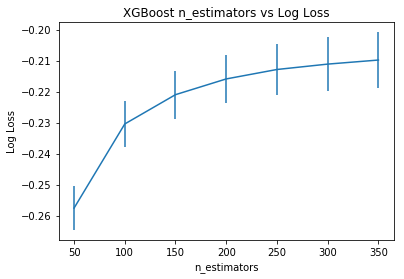

In [40]:
model = XGBClassifier()
n_estimators = range(50, 400, 50)
param_grid = dict(n_estimators=n_estimators)
kfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=7)
grid_search = GridSearchCV(model, param_grid, scoring="neg_log_loss", n_jobs=-1, cv=kfold)
grid_result = grid_search.fit(X_train, y_train)
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
	print("%f (%f) with: %r" % (mean, stdev, param))
# plot
plt.errorbar(n_estimators, means, yerr=stds)
plt.title("XGBoost n_estimators vs Log Loss")
plt.xlabel('n_estimators')
plt.ylabel('Log Loss')
plt.savefig('n_estimators.png')

We can see that the cross validation log loss scores are negative. This is because the scikit-learn cross validation framework inverted them. The reason is that internally, the framework requires that all metrics that are being optimized are to be maximized, whereas log loss is a minimization metric. It can easily be made maximizing by inverting the scores.

The best number of trees was n_estimators=350 resulting in a log loss of -0.213537, but really not a significant difference from n_estimators=200. In fact, there is not a large relative difference in the number of trees between 100 and 350 if we plot the results.

Thus, as the number increases, it saturates and doesnt give any significant increase in the log loss

## Tune the Size of Decision Trees in XGBoost

In gradient boosting, we can control the size of decision trees, also called the number of layers or the depth.

Shallow trees are expected to have poor performance because they capture few details of the problem and are generally referred to as weak learners. Deeper trees generally capture too many details of the problem and overfit the training dataset, limiting the ability to make good predictions on new data.

`Generally, boosting algorithms are configured with weak learners, decision trees with few layers, sometimes as simple as just a root node, also called a decision stump rather than a decision tree.`

The maximum depth can be specified in the XGBClassifier and XGBRegressor wrapper classes for XGBoost in the `max_depth` parameter. This parameter takes an integer value and `defaults to a value of 3`.

In [41]:
model = XGBClassifier()
max_depth = range(1, 11, 2)
print(max_depth)
param_grid = dict(max_depth=max_depth)
kfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=7)
grid_search = GridSearchCV(model, param_grid, scoring="neg_log_loss", n_jobs=-1, cv=kfold, verbose=1)
grid_result = grid_search.fit(X_train, y_train)
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

range(1, 11, 2)
Fitting 10 folds for each of 5 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:   18.1s
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:   36.7s finished


Best: -0.208717 using {'max_depth': 7}
-0.332794 (0.006114) with: {'max_depth': 1}
-0.230445 (0.007295) with: {'max_depth': 3}
-0.212772 (0.008162) with: {'max_depth': 5}
-0.208717 (0.008442) with: {'max_depth': 7}
-0.213550 (0.009436) with: {'max_depth': 9}


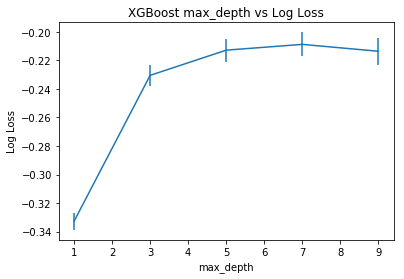

In [42]:
plt.errorbar(max_depth, means, yerr=stds)
plt.title("XGBoost max_depth vs Log Loss")
plt.xlabel('max_depth')
plt.ylabel('Log Loss')
plt.savefig('max_depth.png')

Reviewing the plot of log loss scores, we can see a marked `jump from max_depth=1 to max_depth=3` then pretty even performance for the rest the values of max_depth.

Although the best score was observed for max_depth=5, it is interesting to note that there was practically little difference between using max_depth=3 or max_depth=7.

Further, if we see, the value of logg loss depriciates as the max_depth value increases. Thus, the max value of log loss is at `max_depth` of around `7`

This suggests a point of diminishing returns in max_depth on a problem that you can tease out using grid search. A graph of max_depth values is plotted against (inverted) logarithmic loss below.

### Tune The Number of Trees and Max Depth in XGBoost

There is a relationship between the number of trees in the model and the depth of each tree.

We would expect that deeper trees would result in fewer trees being required in the model, and the inverse where simpler trees (such as decision stumps) require many more trees to achieve similar results.

We can investigate this relationship by evaluating a grid of n_estimators and max_depth configuration values. To avoid the evaluation taking too long, we will limit the total number of configuration values evaluated. Parameters were chosen to tease out the relationship rather than optimize the model.

We will create a grid of 4 different n_estimators values (350, 300, 250, 400) and 4 different max_depth values (6, 7, 8, 9) and each combination will be evaluated using 10-fold cross validation. A total of 4410 or 160 models will be trained and evaluated.

In [43]:
# grid search
model = XGBClassifier()
n_estimators = [350, 300, 250, 400]
max_depth = [6, 7, 8, 9]
print(max_depth)
param_grid = dict(max_depth=max_depth, n_estimators=n_estimators)
kfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=7)
grid_search = GridSearchCV(model, param_grid, scoring="neg_log_loss", n_jobs=-1, cv=kfold, verbose=1)
grid_result = grid_search.fit(X_train, y_train)
# summarize results
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
	print("%f (%f) with: %r" % (mean, stdev, param))
    
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))

[6, 7, 8, 9]
Fitting 10 folds for each of 16 candidates, totalling 160 fits


[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:  1.2min
[Parallel(n_jobs=-1)]: Done 160 out of 160 | elapsed:  7.0min finished


-0.213614 (0.011092) with: {'max_depth': 6, 'n_estimators': 350}
-0.211414 (0.010003) with: {'max_depth': 6, 'n_estimators': 300}
-0.209833 (0.009825) with: {'max_depth': 6, 'n_estimators': 250}
-0.215573 (0.011833) with: {'max_depth': 6, 'n_estimators': 400}
-0.219784 (0.010701) with: {'max_depth': 7, 'n_estimators': 350}
-0.216819 (0.009655) with: {'max_depth': 7, 'n_estimators': 300}
-0.213906 (0.009352) with: {'max_depth': 7, 'n_estimators': 250}
-0.222747 (0.011230) with: {'max_depth': 7, 'n_estimators': 400}
-0.228617 (0.011943) with: {'max_depth': 8, 'n_estimators': 350}
-0.223884 (0.011071) with: {'max_depth': 8, 'n_estimators': 300}
-0.218909 (0.010237) with: {'max_depth': 8, 'n_estimators': 250}
-0.233518 (0.012673) with: {'max_depth': 8, 'n_estimators': 400}
-0.238339 (0.013237) with: {'max_depth': 9, 'n_estimators': 350}
-0.232669 (0.012221) with: {'max_depth': 9, 'n_estimators': 300}
-0.227330 (0.011701) with: {'max_depth': 9, 'n_estimators': 250}
-0.243587 (0.013936) with

Now, as seen above, we try ti find the log loss for a range of n_extimators given. And find that the best(which denotes min log loss) comes around the configuration of `max_depth = 6 & n_estimator = 250`

Now based on the 4 different range for n_estimator we plot the log loss to perform our analysis

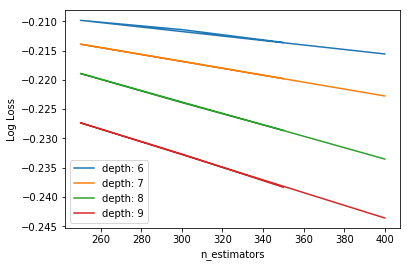

In [44]:
# plot results
scores = np.array(means).reshape(len(max_depth), len(n_estimators))
for i, value in enumerate(max_depth):
    plt.plot(n_estimators, scores[i], label='depth: ' + str(value))
plt.legend()
plt.xlabel('n_estimators')
plt.ylabel('Log Loss')
plt.savefig('n_estimators_vs_max_depth.png')

We can see that the best result was achieved with a n_estimators=250 and max_depth=6, similar to the best values found from the previous two rounds of standalone parameter tuning (n_estimators=250, max_depth=5).

We can plot the relationship between each series of max_depth values for a given n_estimators.

Fewer boosted trees are required with increased tree depth.

Further, we would expect the increase complexity provided by deeper individual trees to result in greater overfitting of the training data which would be exacerbated by having more trees, in turn resulting in a lower cross validation score. We don’t see this here as our trees are not that deep nor do we have too many. Exploring this expectation is left as an exercise you could explore yourself.

In [45]:
model = XGBClassifier(max_depth=6, n_estimators=250)

In [46]:
print(model)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=6, min_child_weight=1, missing=None, n_estimators=250,
       n_jobs=1, nthread=None, objective='binary:logistic', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1)


In [47]:
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
predictions = [round(value) for value in y_pred]

In [48]:
print('ROC for the XGBoost model is: ' + str(evaluate(model, X_train,y_train, X_test, y_test)))

ROC for the XGBoost model is: 0.9165764840142064


### `Conclusion`
#### Thus we got a higher ROC for XGBoost model than the bagging models tried earlier

## `Part B`

## Classification with Logistic Regression

Compare logistic regression with the based tree algorithms in Part A on the same data. Answer the following questions for logistic regression:

Which independent variables are important?
Is there multi-colinearity?
How does it compare to the the models in Part A?
We need to develop a Nominal Logistic Regression model which will predict whether the house price is HIGH(1) or LOW(-1)

In [50]:
import statsmodels.api as sm
import statsmodels.formula.api as smf
import pandas as pd
from sklearn.linear_model import LogisticRegression

In [123]:
features['price_cat_log'] = features['price'].apply(lambda x: 1 if x > median_price else 0)
features.columns

Index(['index', 'price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
       'waterfront', 'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated',
       'lat', 'long', 'sqft_living15', 'sqft_lot15', 'basement_present',
       'renovated', 'floors#1.0', 'floors#1.5', 'floors#2.0', 'floors#2.5',
       'floors#3.0', 'floors#3.5', 'view#0', 'view#1', 'view#2', 'view#3',
       'view#4', 'condition#1', 'condition#2', 'condition#3', 'condition#4',
       'condition#5', 'grade#1', 'grade#3', 'grade#4', 'grade#5', 'grade#6',
       'grade#7', 'grade#8', 'grade#9', 'grade#10', 'grade#11', 'grade#12',
       'grade#13', 'zipcode#98004', 'zipcode#98102', 'zipcode#98109',
       'zipcode#98112', 'zipcode#98039', 'zipcode#98040', 'price_cat',
       'price_cat_log'],
      dtype='object')

In [52]:
price_cat_log=features['price_cat_log']
y_log=price_cat_log

In [53]:
X_train_log,X_test_log,y_train_log,y_test_log=train_test_split(features[['bedrooms', 'sqft_living', 'waterfront', 'sqft_basement', 'yr_built', 'bathrooms']]
                                                               ,y_log,test_size=0.3,random_state=0)

In [54]:
logreg=LogisticRegression().fit(X_train_log,y_train_log)
logreg
print("Training set score: {:.3f}".format(logreg.score(X_train_log,y_train_log)))
print("Test set score: {:.3f}".format(logreg.score(X_test_log,y_test_log)))

Training set score: 0.733
Test set score: 0.738


In [55]:
logit_model=sm.Logit(y_train_log,X_train_log)
result=logit_model.fit()
print(result.summary())

Optimization terminated successfully.
         Current function value: 0.520241
         Iterations 8
                           Logit Regression Results                           
Dep. Variable:          price_cat_log   No. Observations:                13561
Model:                          Logit   Df Residuals:                    13555
Method:                           MLE   Df Model:                            5
Date:                Wed, 30 Jan 2019   Pseudo R-squ.:                  0.2493
Time:                        03:15:43   Log-Likelihood:                -7055.0
converged:                       True   LL-Null:                       -9398.3
                                        LLR p-value:                     0.000
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
bedrooms         -0.2882      0.030     -9.708      0.000      -0.346      -0.230
sqft_living       0.

### Looking at the z scores, we know that, `sqft_living` is the most significant followed by `yr_built` and then the rest.

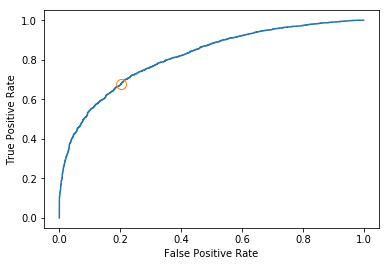

In [56]:
from sklearn.metrics import roc_curve
falsepos,truepos,thresholds=roc_curve(y_test_log,logreg.decision_function(X_test_log))

plt.plot(falsepos,truepos,label="ROC")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")

cutoff=np.argmin(np.abs(thresholds))
plt.plot(falsepos[cutoff],truepos[cutoff],'o',markersize=10,label="cutoff",fillstyle="none")
plt.show()

Now, from the `AUC-ROC curve` above - at the cordinates `(0.2,0.7)` lies the threshold for the curve.

In [57]:
from sklearn import metrics
metrics.auc(falsepos, truepos)

0.8164931856465912

Now as the `AUC = 0.8164` which is closer to 1, gives a moderate value of performance. But, the result of comparison between the regression model between: `Random Forest`, `XGBoost` & `Logistic` is as below.

### As compared to Models in Part A, the accuracy of the Logistic Regression model is less.

## `Part C`

## Regression with Trees

Compare at least one bagging based tree algorithm (e.g. Random Forest) with a boosting based tree algorithm on a regression problem. Answer the following questions for each supervised learner:

Which hyper-parameters are important?
What hyper-parameter values work best?
Which supervised learner works best on the test data?

### Random Forest based Regression

To look at the available hyperparameters, we can create a random forest and examine the default values.

In [58]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(random_state = 42)
from pprint import pprint
# Look at parameters used by our current forest
print('Parameters currently in use:\n')
pprint(rf.get_params())

Parameters currently in use:

{'bootstrap': True,
 'criterion': 'mse',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 10,
 'n_jobs': 1,
 'oob_score': False,
 'random_state': 42,
 'verbose': 0,
 'warm_start': False}


* estimators = number of trees in the foreset
* max_features = max number of features considered for splitting a node
* max_depth = max number of levels in each decision tree
* min_samples_split = min number of data points placed in a node before the node is split
* min_samples_leaf = min number of data points allowed in a leaf node
* bootstrap = method for sampling data points (with or without replacement)

In [59]:
X_features_reg = ['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
       'waterfront', 'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated',
       'lat', 'long', 'sqft_living15', 'sqft_lot15', 'basement_present',
       'renovated', 'floors#1.0', 'floors#1.5', 'floors#2.0', 'floors#2.5',
       'floors#3.0', 'floors#3.5', 'view#0', 'view#1', 'view#2', 'view#3',
       'view#4', 'condition#1', 'condition#2', 'condition#3', 'condition#4',
       'condition#5', 'grade#1', 'grade#3', 'grade#4', 'grade#5', 'grade#6',
       'grade#7', 'grade#8', 'grade#9', 'grade#10', 'grade#11', 'grade#12',
       'grade#13', 'zipcode#98004', 'zipcode#98102', 'zipcode#98109',
       'zipcode#98112', 'zipcode#98039', 'zipcode#98040']

X_reg=features[['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
       'waterfront', 'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated',
       'lat', 'long', 'sqft_living15', 'sqft_lot15', 'basement_present',
       'renovated', 'floors#1.0', 'floors#1.5', 'floors#2.0', 'floors#2.5',
       'floors#3.0', 'floors#3.5', 'view#0', 'view#1', 'view#2', 'view#3',
       'view#4', 'condition#1', 'condition#2', 'condition#3', 'condition#4',
       'condition#5', 'grade#1', 'grade#3', 'grade#4', 'grade#5', 'grade#6',
       'grade#7', 'grade#8', 'grade#9', 'grade#10', 'grade#11', 'grade#12',
       'grade#13', 'zipcode#98004', 'zipcode#98102', 'zipcode#98109',
       'zipcode#98112', 'zipcode#98039', 'zipcode#98040']]  # Features

y_reg=features['price']  # Labels
       
# Split dataset into training set and test set
X_train_reg, X_test_reg, y_train_reg, y_test_reg = train_test_split(X_reg, y_reg, test_size=0.3) # 70% training and 30% test

### Random Search Cross Validation in Scikit-Learn

To use RandomizedSearchCV, we first need to create a parameter grid to sample from during fitting:

In [61]:
from sklearn.model_selection import RandomizedSearchCV
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 10, stop = 200, num = 5)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(2, 10, num = 5)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [2, 4]
# Method of selecting samples for training each tree
#bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf}
pprint(random_grid)

{'max_depth': [2, 4, 6, 8, 10, None],
 'max_features': ['auto', 'sqrt'],
 'min_samples_leaf': [2, 4],
 'min_samples_split': [5, 10],
 'n_estimators': [10, 57, 105, 152, 200]}


In [62]:
# Use the random grid to search for best hyperparameters
# First create the base model to tune
rf = RandomForestRegressor()
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)
# Fit the random search model
rf_random.fit(X_train_reg, y_train_reg)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:   12.2s
[Parallel(n_jobs=-1)]: Done 138 tasks      | elapsed:   36.4s
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed:  1.8min finished


RandomizedSearchCV(cv=3, error_score='raise',
          estimator=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
           oob_score=False, random_state=None, verbose=0, warm_start=False),
          fit_params=None, iid=True, n_iter=100, n_jobs=-1,
          param_distributions={'n_estimators': [10, 57, 105, 152, 200], 'max_features': ['auto', 'sqrt'], 'max_depth': [2, 4, 6, 8, 10, None], 'min_samples_split': [5, 10], 'min_samples_leaf': [2, 4]},
          pre_dispatch='2*n_jobs', random_state=42, refit=True,
          return_train_score='warn', scoring=None, verbose=2)

In [63]:
def evaluate_reg(model, test_features, test_labels):
    predictions = model.predict(test_features)
    errors = abs(predictions - test_labels)
    mape = 100 * np.mean(errors / test_labels)
    accuracy = 100 - mape
    print('Model Performance')
    print('Average Error: {:0.4f} degrees.'.format(np.mean(errors)))
    print('Accuracy = {:0.2f}%.'.format(accuracy))
    
    return accuracy
base_model = RandomForestRegressor(n_estimators = 10, random_state = 42)
base_model.fit(X_train_reg, y_train_reg)
base_accuracy = evaluate_reg(base_model, X_test_reg, y_test_reg)

Model Performance
Average Error: 75004.9212 degrees.
Accuracy = 86.14%.


In [64]:
rf_random.best_estimator_

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=2, min_samples_split=5,
           min_weight_fraction_leaf=0.0, n_estimators=200, n_jobs=1,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [65]:
best_random = rf_random.best_estimator_
random_accuracy = evaluate_reg(best_random, X_test_reg, y_test_reg)

Model Performance
Average Error: 71018.6331 degrees.
Accuracy = 86.97%.


### Grid Search with Cross Validation

In [66]:
from sklearn.model_selection import GridSearchCV
# Create the parameter grid based on the results of random search 
param_grid = {
    'bootstrap': [True, False],
    'max_depth': [None],
    'max_features': [2, 3],
    'min_samples_leaf': [2,3,4],
    'min_samples_split': [3,5,7],
    'n_estimators': [100, 200, 300, 1000]
}
# Create a based model
rf = RandomForestRegressor()

# Instantiate the grid search model
grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, 
                          cv = 3, n_jobs = -1, verbose = 2)

In [67]:
# Fit the grid search to the data
grid_search.fit(X_train_reg, y_train_reg)
grid_search.best_params_

Fitting 3 folds for each of 144 candidates, totalling 432 fits


[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:   10.7s
[Parallel(n_jobs=-1)]: Done 138 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done 341 tasks      | elapsed:  2.8min
[Parallel(n_jobs=-1)]: Done 432 out of 432 | elapsed:  5.4min finished


{'bootstrap': False,
 'max_depth': None,
 'max_features': 3,
 'min_samples_leaf': 2,
 'min_samples_split': 3,
 'n_estimators': 1000}

In [69]:
best_grid = grid_search.best_estimator_
grid_accuracy = evaluate_reg(best_grid, X_test_reg, y_test_reg)

Model Performance
Average Error: 89737.4405 degrees.
Accuracy = 82.58%.


Thus, for Random Forest Regression, the best parameters are as below with the values:

`'bootstrap': False,
 'max_depth': None,
 'max_features': 3,
 'min_samples_leaf': 2,
 'min_samples_split': 3,
 'n_estimators': 1000`

## Now lets implement XGBoost (eXtreme Gradient Boosting)

In [70]:
from xgboost import XGBRegressor

In [71]:
base_model = XGBRegressor()
base_model.fit(X_train_reg, y_train_reg)
base_accuracy = evaluate_reg(base_model, X_test_reg, y_test_reg)

Model Performance
Average Error: 81142.7016 degrees.
Accuracy = 84.72%.


In [72]:
base_model

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1)

In [73]:
model = XGBRegressor()
n_estimators = range(50, 400, 50)
param_grid = dict(n_estimators=n_estimators)
kfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=7)
grid_search = GridSearchCV(model, param_grid, n_jobs=-1, cv=kfold)
grid_result = grid_search.fit(X_train, y_train)
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
	print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.709947 using {'n_estimators': 350}
0.678499 (0.010506) with: {'n_estimators': 50}
0.691785 (0.010954) with: {'n_estimators': 100}
0.699346 (0.010951) with: {'n_estimators': 150}
0.703286 (0.011527) with: {'n_estimators': 200}
0.706279 (0.011286) with: {'n_estimators': 250}
0.708109 (0.011325) with: {'n_estimators': 300}
0.709947 (0.011026) with: {'n_estimators': 350}


In [74]:
model = XGBRegressor()
max_depth = range(1, 11, 2)
print(max_depth)
param_grid = dict(max_depth=max_depth)
kfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=7)
grid_search = GridSearchCV(model, param_grid, n_jobs=-1, cv=kfold, verbose=1)
grid_result = grid_search.fit(X_train_reg, y_train_reg)
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
	print("%f (%f) with: %r" % (mean, stdev, param))

range(1, 11, 2)
Fitting 10 folds for each of 5 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:   43.1s
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:  1.5min finished


Best: 0.849282 using {'max_depth': 7}
0.651908 (0.039974) with: {'max_depth': 1}
0.804544 (0.031639) with: {'max_depth': 3}
0.842598 (0.032449) with: {'max_depth': 5}
0.849282 (0.032858) with: {'max_depth': 7}
0.845120 (0.037325) with: {'max_depth': 9}


### Grid Search with Cross Validation for XGBoost

In [75]:
# grid search
model = XGBRegressor()
n_estimators = [300,350,400]
max_depth = [4,5,6,7]
print(max_depth)
param_grid = dict(max_depth=max_depth, n_estimators=n_estimators)
kfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=7)
grid_search = GridSearchCV(model, param_grid, n_jobs=-1, cv=kfold, verbose=1)
grid_result = grid_search.fit(X_train, y_train)
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
	print("%f (%f) with: %r" % (mean, stdev, param))

[4, 5, 6, 7]
Fitting 10 folds for each of 12 candidates, totalling 120 fits


[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:  2.7min
[Parallel(n_jobs=-1)]: Done 120 out of 120 | elapsed: 12.2min finished


Best: 0.731772 using {'max_depth': 6, 'n_estimators': 300}
0.722061 (0.011605) with: {'max_depth': 4, 'n_estimators': 300}
0.723172 (0.011547) with: {'max_depth': 4, 'n_estimators': 350}
0.723499 (0.011590) with: {'max_depth': 4, 'n_estimators': 400}
0.728753 (0.012032) with: {'max_depth': 5, 'n_estimators': 300}
0.728627 (0.011948) with: {'max_depth': 5, 'n_estimators': 350}
0.728124 (0.011695) with: {'max_depth': 5, 'n_estimators': 400}
0.731772 (0.011752) with: {'max_depth': 6, 'n_estimators': 300}
0.730486 (0.011677) with: {'max_depth': 6, 'n_estimators': 350}
0.729556 (0.011760) with: {'max_depth': 6, 'n_estimators': 400}
0.727369 (0.010811) with: {'max_depth': 7, 'n_estimators': 300}
0.725842 (0.011086) with: {'max_depth': 7, 'n_estimators': 350}
0.724776 (0.011462) with: {'max_depth': 7, 'n_estimators': 400}


In [121]:
grid_result.best_estimator_
# best_XGBoost

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=6, min_child_weight=1, missing=None, n_estimators=300,
       n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1)

In [126]:
grid_search.fit(X_train_reg, y_train_reg)
grid_search.best_params_
# grid_search.best_params_

Fitting 10 folds for each of 12 candidates, totalling 120 fits


[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:  2.8min
[Parallel(n_jobs=-1)]: Done 120 out of 120 | elapsed: 11.1min finished


{'max_depth': 5, 'n_estimators': 400}

In [77]:
best_XGBoost.fit(X_train_reg, y_train_reg)
best_accuracy = evaluate_reg(best_XGBoost, X_test_reg, y_test_reg)

Model Performance
Average Error: 65977.5292 degrees.
Accuracy = 87.79%.


It turns out to be only 2 important parameters for XGBoost regression problem. And they are as below:
    
`'max_depth': 5, 'n_estimators': 400`

#### Evaluating the regression models

In [78]:
from sklearn.metrics import mean_squared_error
from math import sqrt

### `Conclusion` on important hyperprameters

As seen, the end result comibing both Random Forest Regression and XGBoost hyperparamters:

* Random Forest hyperparamters

`'bootstrap': False,'max_depth': None,
'max_features': 3,
'min_samples_leaf': 2,
'min_samples_split': 3,
'n_estimators': 1000`

* XGBoost hyperparamters

`'max_depth': 5, 
'n_estimators': 400`

Thus, the best hyperparamters in combining them are 

`'max_depth', & 'n_estimators'`

## `Part D`

### Linear Regression

Simple Linear regression on predicting `Price`

In [110]:
from sklearn import cross_validation

In [119]:
# Train a simple linear regression model
regr = linear_model.LinearRegression()
new_data = features[['sqft_living', 'sqft_above', 'sqft_living15','bathrooms','sqft_basement','lat','waterfront','yr_built','bedrooms']]

X = new_data.values
y = features.price.values

# splitting the data into training and test in 8:2 ratio
X_train, X_test, y_train, y_test = cross_validation.train_test_split(X, y ,test_size=0.2)

regr.fit(X_train, y_train)
regr.predict(X_test)
print("Score on Linear Regression"+" "+str(regr.score(X_test,y_test)))
# Calculate the Root Mean Squared Error
print("RMSE: %.2f" % math.sqrt(np.mean((regr.predict(X_test) - y_test) ** 2)))

Score on Linear Regression 0.6269904550778559
RMSE: 222718.67


In [81]:
#Random Forest best model
print('Random forest best model RMSE is : ' + str(round(sqrt(mean_squared_error(best_random.predict(X_test_reg), y_test_reg)),2)))
#XGBoost Best model
print('XGBoost best model RMSE is : ' + str(round(sqrt(mean_squared_error(best_XGBoost.predict(X_test_reg), y_test_reg)),2)))

Random forest best model RMSE is : 137073.54
XGBoost best model RMSE is : 124984.51


As seen the `score` and `RMSE` is high enough to prove that Linear Regression doesnt give a good measure of performace.

### XGBoost Algo provides better predictions than Random Forest for the regression problem. And both of them provide a lower RMSE than Linear Regression

## Regularization

### Ridge Regression

Ridge regression aims to avoid overfitting by adding a cost to the Residual Sum of Squares (RSS) term of standard least squares that depends on the 2-norm of the coefficients. The result is penalizing fits with large coefficients. The strength of this penalty, and thus the fit vs. model complexity, is controlled by a parameter lamda.

Following the usual notation, suppose our regression equation is written in matrix form as

###  $$Y = XB + e$$

where Y is the dependent variable, X represents the independent variables, B is the regression coefficients to be
estimated, and e represents the errors are residuals. 

In short, in the Ridge Regression, we add a bit of biasing in order to avoiad overfitting of the model and generate a model for better prediction in a long run

In [123]:
##Splitting the data in train-test split
from sklearn.cross_validation import train_test_split
from sklearn import linear_model
train_data, test_data = train_test_split(features, train_size = 0.8, random_state = 10)

In [118]:
train_data.shape

(15499, 53)

In [119]:
test_data.shape

(3875, 53)

In [120]:
test_data.describe()

,index,price,bedrooms,bathrooms,sqft_living,sqft_lot,waterfront,sqft_above,sqft_basement,yr_built,...,grade#12,grade#13,zipcode#98004,zipcode#98102,zipcode#98109,zipcode#98112,zipcode#98039,zipcode#98040,price_cat,price_cat_log
count,3875.000000,3.875000e+03,3875.000000,3875.000000,3875.000000,3875.000000,3875.000000,3875.000000,3875.000000,3875.000000,...,3875.000000,3875.000000,3875.000000,3875.000000,3875.000000,3875.000000,3875.000000,3875.000000,3875.000000,3875.000000
mean,10693.091355,5.372533e+05,3.348645,2.117548,2075.899097,15076.047226,0.007742,1787.494452,288.404645,1971.965935,...,0.004645,0.000258,0.014968,0.005935,0.005677,0.015484,0.002065,0.013161,-0.006452,0.496774
std,6285.270359,3.434137e+05,0.885258,0.753705,905.892879,40606.925180,0.087658,816.541711,435.062747,29.254996,...,0.068006,0.016064,0.121439,0.076823,0.075144,0.123483,0.045396,0.113980,1.000108,0.500054
min,3.000000,8.500000e+04,0.000000,0.000000,290.000000,572.000000,0.000000,290.000000,0.000000,1900.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-1.000000,0.000000
25%,5297.000000,3.250000e+05,3.000000,1.750000,1430.000000,5000.000000,0.000000,1200.000000,0.000000,1953.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-1.000000,0.000000
50%,10598.000000,4.500000e+05,3.000000,2.250000,1920.000000,7560.000000,0.000000,1570.000000,0.000000,1977.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-1.000000,0.000000
75%,16046.500000,6.400000e+05,4.000000,2.500000,2540.000000,10827.000000,0.000000,2210.000000,540.000000,1998.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000
max,21612.000000,3.850000e+06,10.000000,8.000000,13540.000000,982998.000000,1.000000,9410.000000,4130.000000,2015.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [121]:
train_data_2, validation_data = train_test_split(train_data, train_size = 0.75, random_state = 50)

Let's test two models using alpha equal 1 and 10.

In [141]:
input_feature = train_data.columns.values.tolist() # list of column name
input_feature.remove('price')
#input_feature


for i in [1,10]:
    ridge = linear_model.Ridge(alpha = i, normalize = True) # initialize the model
    ridge.fit(train_data.as_matrix(columns = input_feature), train_data.as_matrix(columns = ['price'])) # fit the train data

    
    mse = mean_squared_error(test_data.as_matrix(columns = ['price']).astype(np.int), 
                             ridge.predict(test_data.as_matrix(columns = [input_feature]).astype(np.int)))
    print ('test error (RMSE) is:' + str(mse))

test error (RMSE) is:4.51545192561002e+31
test error (RMSE) is:3.2273681737795096e+30


### Ridge Cross Validation

In [140]:
ridgeCV = linear_model.RidgeCV(alphas = np.linspace(1.0e-10,1,num = 100), normalize = True, store_cv_values = True) # initialize the model
ridgeCV.fit(train_data.as_matrix(columns = input_feature), train_data.as_matrix(columns = ['price'])) # fit the train data
print ('best alpha is: %s' %ridgeCV.alpha_) # get the best alpha
print ('test error (RMSE) is: %s' %mean_squared_error(test_data.as_matrix(columns = ['price']).astype(int), 
                              ridgeCV.predict(test_data.as_matrix(columns = [input_feature]).astype(int)))**0.5) # predict price and test error

best alpha is: 1e-10
test error (RMSE) is: 2945413716627902.5


Finally, we get a score of RMSE : `29e+14` which is too high for Ridge Regression problem

## `Part E`

Another supervised algorithm

### k-Nearest Neighbors (NN) Regression

The k-NN algorithm is used for estimating continuous variables. One such algorithm uses a weighted average of the k nearest neighbors, weighted by the inverse of their distance. It is the nonparamtric equivalent of ordinary least square regression.

In [134]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn import preprocessing # provides functions and classes to change raw feature vectors
from sklearn import neighbors # provides functionality for unsupervised and supervised neighbors-based learning methods

In [139]:
# normalize the data
train_X = train_data.as_matrix(columns = input_feature)
scaler = preprocessing.StandardScaler().fit(train_X)
train_X_scaled = scaler.transform(train_X)
test_X = test_data.as_matrix(columns = [input_feature]).astype(int)
test_X_scaled = scaler.transform(test_X)

knn = neighbors.KNeighborsRegressor(n_neighbors=10, weights='distance') # initialize the model
knn.fit(train_X_scaled, train_data.as_matrix(columns = ['price']).astype(int)) # fit the train data
print ('test error (RMSE) is: %s' %mean_squared_error(test_data.as_matrix(columns = ['price']).astype(int), 
                              knn.predict(test_X_scaled))**0.5) # predict price and test error

test error (RMSE) is: 430340.0895801561


Similarly, the number of neighbor k is related to the complexity of the regression model. We can optimize the model accuracy by running cross-validation on the number of k-neighbors to include.

## `Conclusion`

After we have finally run and analysed different model. We list it our and summarise our finding. The algorithms run and their accuracy/metric of performace has been listed with their relation with the hyperparamters importance.

Dataset : King County Housing Data set


|Algorithms                        |Classification/Regression|Performance                  |Hyperparamter importance|
|:--------------------------------:|:-----------------------:|:---------------------------:|:----------------------:|
|Random Forest Classifier(Boosting)|Classification           |Accuracy: 0.906760708756236  | `n_estimators` `min_samples_leaf` `max_features` `min_samples_split` |
|XGBoost Classifier(Bagging)       |Classification           |Accuracy: 90.61%             | `n_estimators` `min_samples_leaf` `max_features` `min_samples_split` |
|Random Forest Regression          |Regression               |Accuracy = 86.14% , `RMSE`: 137073.54 | `bootstrap` `max_depth` `max_features` `min_samples_leaf` `min_samples_split` `n_estimators`|
|XGBoost Regression                |Regression               |Accuracy = 84.72%, `RMSE`: 124984.51  | `max_depth` `n_estimators`|
|Logistic Regression               |Regression               |Training set score: 0.733 Test set score: 0.738  |  |
|Linear Regression                 |Regression               |`RMSE`: 222718.67                                |  |
|Ridge Regression                  |Regression               |`RMSE`: 3.2273e+30(alpha 10)                     |  |
|k-NN Regression                   |Regression               |`RMSE`: 430340.0895                              |  |


##### Thus, from the table seen above and analysis made for all the listed algorithms, the best performing algorithm for the given dataset is `XGBoost classifier` in the case of classifying problem, while in the regression problem `Random Forest Regression` takes up the lead.

The reason being said is due to their respective `Accuracy` and `RMSE` value compared to their competitors in the classification/regression problem.

##### Respectively we can combine their Hyperparameters and say that `n_estimators` & `max_depth` are one of the important hyperparamters which determines their performance and can be tuned using the same.

## `Contribution`

The explanations are own. There were few websites that were refered for better understanding and quoting the statement to its better accuracy, and making it more understanding. The implementation of k-NN Regression and Ridge Regression was done by own. Thus the percentage of contribution can be 30% own and 70% reference

## `Citations`

I have thoroughly read different Kaggle notebooks on this data set in Python and R and tried to incorporate the key features from their notebooks. https://www.kaggle.com/harlfoxem/housesalesprediction

Prof. GitHub - https://github.com/nikbearbrown/CSYE_7245/blob/master/Assignments/Assignment_1_Properly_Format_and_Explain.ipynb

* Random forest Classifer : https://www.datacamp.com/community/tutorials/random-forests-classifier-python
* Random Forest Regression : https://towardsdatascience.com/hyperparameter-tuning-the-random-forest-in-python-using-scikit-learn-28d2aa77dd74
* XGBoost Classifier & XGBoost Regression :
* https://machinelearningmastery.com/develop-first-xgboost-model-python-scikit-learn/
* https://machinelearningmastery.com/tune-number-size-decision-trees-xgboost-python/

* Logistic Regression : http://www.michaeljgrogan.com/statsmodels-sklearn-linear-regression/

## `Copyright`

The code in the document by Prabhu Subramanian is licensed under the MIT License https://opensource.org/licenses/MIT

Copyright 2019 Prabhu Subramanian

Permission is hereby granted, free of charge, to any person obtaining a copy of this software and associated documentation files (the "Software"), to deal in the Software without restriction, including without limitation the rights to use, copy, modify, merge, publish, distribute, sublicense, and/or sell copies of the Software, and to permit persons to whom the Software is furnished to do so, subject to the following conditions:

The above copyright notice and this permission notice shall be included in all copies or substantial portions of the Software.

THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY, FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL THE AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING FROM, OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER DEALINGS IN THE SOFTWARE.